In [126]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [127]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
# import scipy.stats as stats

In [128]:
ind_vacancies = pd.read_csv("../../data/Job-Vacancies/14100400.csv")

In [129]:
ind_vacancies = ind_vacancies[['GEO', 'North American Industry Classification System (NAICS)', 'Statistics', 'UOM', 'REF_DATE', 'VALUE', 'STATUS']]

ind_vacancies


,GEO,North American Industry Classification System (NAICS),Statistics,UOM,REF_DATE,VALUE,STATUS
0,Canada,"Total, all industries",Job vacancies,Number,2015-01,446380.0,E
1,Canada,"Total, all industries",Payroll employees,Number,2015-01,15087965.0,D
2,Canada,"Total, all industries",Job vacancy rate,Percent,2015-01,2.9,E
3,Canada,"Agriculture, forestry, fishing and hunting [11]",Job vacancies,Number,2015-01,13920.0,E
4,Canada,"Agriculture, forestry, fishing and hunting [11]",Payroll employees,Number,2015-01,204040.0,D
...,...,...,...,...,...,...,...
2515,Canada,Other services (except public administration) ...,Payroll employees,Number,2025-04,571790.0,A
2516,Canada,Other services (except public administration) ...,Job vacancy rate,Percent,2025-04,4.0,A
2517,Canada,Public administration [91],Job vacancies,Number,2025-04,13600.0,A
2518,Canada,Public administration [91],Payroll employees,Number,2025-04,589650.0,A


In [130]:
ind_vacancies['REF_DATE'] = pd.to_datetime(ind_vacancies['REF_DATE'])

ind_vacancies = ind_vacancies[(ind_vacancies['REF_DATE'] >= "2016-01-01")]

In [131]:
ind_vacancies["Quarter"] = ind_vacancies["REF_DATE"].dt.quarter
ind_vacancies["Year"] = ind_vacancies["REF_DATE"].dt.year

/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_41474/1912837570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vacancies["Quarter"] = ind_vacancies["REF_DATE"].dt.quarter
/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_41474/1912837570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vacancies["Year"] = ind_vacancies["REF_DATE"].dt.year


In [132]:
ind_vacancies["VALUE"].shift(1, fill_value=0)
ind_vacancies['Prev_Value'] = ind_vacancies.groupby(['Quarter', 'North American Industry Classification System (NAICS)', 'Statistics'])['VALUE'].shift(periods=1, fill_value=0)
ind_vacancies['Difference by Quarter'] = np.where(ind_vacancies['Prev_Value'] != 0, ind_vacancies['VALUE'] - ind_vacancies['Prev_Value'], 0)

ind_vacancies

/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_41474/3434167032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vacancies['Prev_Value'] = ind_vacancies.groupby(['Quarter', 'North American Industry Classification System (NAICS)', 'Statistics'])['VALUE'].shift(periods=1, fill_value=0)
/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_41474/3434167032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vacancies['Difference by Quarter'] = np.where(ind_vacancies['Prev_Value'] !=

,GEO,North American Industry Classification System (NAICS),Statistics,UOM,REF_DATE,VALUE,STATUS,Quarter,Year,Prev_Value,Difference by Quarter
252,Canada,"Total, all industries",Job vacancies,Number,2016-01-01,367390.0,A,1,2016,0.0,0.0
253,Canada,"Total, all industries",Payroll employees,Number,2016-01-01,15202010.0,A,1,2016,0.0,0.0
254,Canada,"Total, all industries",Job vacancy rate,Percent,2016-01-01,2.4,A,1,2016,0.0,0.0
255,Canada,"Agriculture, forestry, fishing and hunting [11]",Job vacancies,Number,2016-01-01,7970.0,B,1,2016,0.0,0.0
256,Canada,"Agriculture, forestry, fishing and hunting [11]",Payroll employees,Number,2016-01-01,210480.0,A,1,2016,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2515,Canada,Other services (except public administration) ...,Payroll employees,Number,2025-04-01,571790.0,A,2,2025,575505.0,-3715.0
2516,Canada,Other services (except public administration) ...,Job vacancy rate,Percent,2025-04-01,4.0,A,2,2025,4.3,-0.3
2517,Canada,Public administration [91],Job vacancies,Number,2025-04-01,13600.0,A,2,2025,14465.0,-865.0
2518,Canada,Public administration [91],Payroll employees,Number,2025-04-01,589650.0,A,2,2025,568865.0,20785.0


In [133]:
ind_vacancies['Median by Quarter'] = ind_vacancies.groupby(['Quarter','North American Industry Classification System (NAICS)', 'Statistics'])['VALUE'].transform('median')
ind_vacancies['Median Change by Quarter'] = ind_vacancies.groupby(['Quarter','North American Industry Classification System (NAICS)', 'Statistics'])['Difference by Quarter'].transform('median')

ind_vacancies

/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_41474/620362677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vacancies['Median by Quarter'] = ind_vacancies.groupby(['Quarter','North American Industry Classification System (NAICS)', 'Statistics'])['VALUE'].transform('median')
/var/folders/sb/b8r8b79d4211ttjd_t_4m83w0000gn/T/ipykernel_41474/620362677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vacancies['Median Change by Quarter'] = ind_vacancies.groupby(['Quarter','North Ame

,GEO,North American Industry Classification System (NAICS),Statistics,UOM,REF_DATE,VALUE,STATUS,Quarter,Year,Prev_Value,Difference by Quarter,Median by Quarter,Median Change by Quarter
252,Canada,"Total, all industries",Job vacancies,Number,2016-01-01,367390.0,A,1,2016,0.0,0.0,555322.5,25470.0
253,Canada,"Total, all industries",Payroll employees,Number,2016-01-01,15202010.0,A,1,2016,0.0,0.0,16233475.0,226257.5
254,Canada,"Total, all industries",Job vacancy rate,Percent,2016-01-01,2.4,A,1,2016,0.0,0.0,3.3,0.1
255,Canada,"Agriculture, forestry, fishing and hunting [11]",Job vacancies,Number,2016-01-01,7970.0,B,1,2016,0.0,0.0,12805.0,-97.5
256,Canada,"Agriculture, forestry, fishing and hunting [11]",Payroll employees,Number,2016-01-01,210480.0,A,1,2016,0.0,0.0,234950.0,2467.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Canada,Other services (except public administration) ...,Payroll employees,Number,2025-04-01,571790.0,A,2,2025,575505.0,-3715.0,547500.0,7870.0
2516,Canada,Other services (except public administration) ...,Job vacancy rate,Percent,2025-04-01,4.0,A,2,2025,4.3,-0.3,4.0,0.1
2517,Canada,Public administration [91],Job vacancies,Number,2025-04-01,13600.0,A,2,2025,14465.0,-865.0,13600.0,75.0
2518,Canada,Public administration [91],Payroll employees,Number,2025-04-01,589650.0,A,2,2025,568865.0,20785.0,517650.0,11125.0


In [134]:
ind_vacancies = ind_vacancies.drop(['Prev_Value'], axis=1)

ind_vacancies['temp'] = abs(ind_vacancies['VALUE'] - ind_vacancies['Median by Quarter'])

ind_vacancies['MAD by Quarter'] = ind_vacancies.groupby(['Quarter','North American Industry Classification System (NAICS)', 'Statistics'])['temp'].transform('median')

ind_vacancies = ind_vacancies.drop(['temp'], axis=1)

In [135]:
k = 2.5 # MAD threshold multiplier
ind_vacancies['Lower Bound'] = ind_vacancies['Median by Quarter'] - k * ind_vacancies['MAD by Quarter']
ind_vacancies['Upper Bound'] = ind_vacancies['Median by Quarter'] + k * ind_vacancies['MAD by Quarter']

ind_vacancies['ZScore'] = (ind_vacancies["VALUE"] - ind_vacancies["Median by Quarter"]) / ind_vacancies['MAD by Quarter']

In [136]:
def find_how_unusual(zscore):
    if (zscore > 3):
        return "Very Unusual"
    elif (zscore > 2):
        return "Unusual"
    else:
        return "Normal"

In [137]:
ind_vacancies['Normality'] = ind_vacancies['ZScore'].apply(find_how_unusual)

ind_vacancies

,GEO,North American Industry Classification System (NAICS),Statistics,UOM,REF_DATE,VALUE,STATUS,Quarter,Year,Difference by Quarter,Median by Quarter,Median Change by Quarter,MAD by Quarter,Lower Bound,Upper Bound,ZScore,Normality
252,Canada,"Total, all industries",Job vacancies,Number,2016-01-01,367390.0,A,1,2016,0.0,555322.5,25470.0,69407.50,3.818038e+05,7.288412e+05,-2.707668,Normal
253,Canada,"Total, all industries",Payroll employees,Number,2016-01-01,15202010.0,A,1,2016,0.0,16233475.0,226257.5,791880.00,1.425378e+07,1.821318e+07,-1.302552,Normal
254,Canada,"Total, all industries",Job vacancy rate,Percent,2016-01-01,2.4,A,1,2016,0.0,3.3,0.1,0.45,2.175000e+00,4.425000e+00,-2.000000,Normal
255,Canada,"Agriculture, forestry, fishing and hunting [11]",Job vacancies,Number,2016-01-01,7970.0,B,1,2016,0.0,12805.0,-97.5,2015.00,7.767500e+03,1.784250e+04,-2.399504,Normal
256,Canada,"Agriculture, forestry, fishing and hunting [11]",Payroll employees,Number,2016-01-01,210480.0,A,1,2016,0.0,234950.0,2467.5,6447.50,2.188312e+05,2.510688e+05,-3.795269,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Canada,Other services (except public administration) ...,Payroll employees,Number,2025-04-01,571790.0,A,2,2025,-3715.0,547500.0,7870.0,12245.00,5.168875e+05,5.781125e+05,1.983667,Normal
2516,Canada,Other services (except public administration) ...,Job vacancy rate,Percent,2025-04-01,4.0,A,2,2025,-0.3,4.0,0.1,0.70,2.250000e+00,5.750000e+00,0.000000,Normal
2517,Canada,Public administration [91],Job vacancies,Number,2025-04-01,13600.0,A,2,2025,-865.0,13600.0,75.0,2000.00,8.600000e+03,1.860000e+04,0.000000,Normal
2518,Canada,Public administration [91],Payroll employees,Number,2025-04-01,589650.0,A,2,2025,20785.0,517650.0,11125.0,26555.00,4.512625e+05,5.840375e+05,2.711354,Unusual


Note you should split the percents and values before viewing the histogram.

In [138]:
ind_vacancies_num_payroll = ind_vacancies[ind_vacancies["Statistics"] == "Payroll employees"]
ind_vacancies_num_vacancy = ind_vacancies[ind_vacancies["Statistics"] == "Job vacancies"]

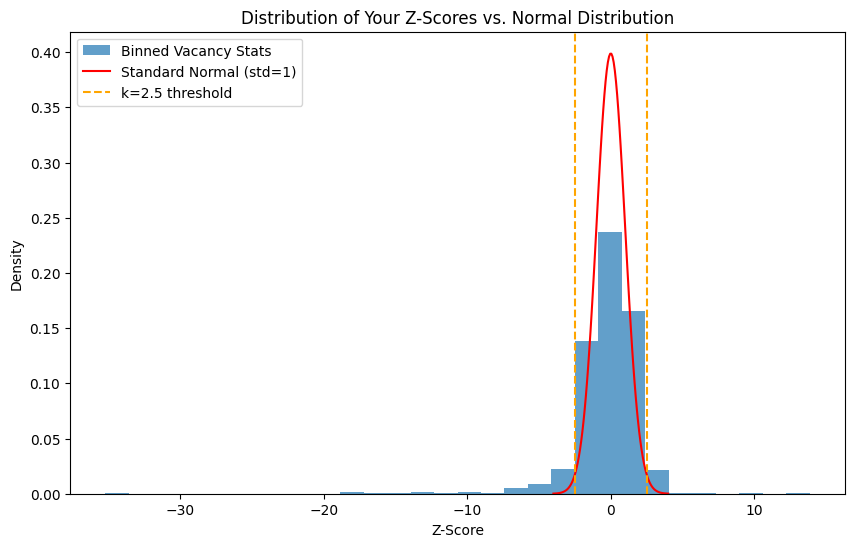

In [139]:
plt.figure(figsize=(10, 6))
plt.hist(ind_vacancies_num_payroll['ZScore'].dropna(), bins=30, density=True, alpha=0.7, label='Binned Vacancy Stats')

# Overlay a standard normal curve for comparison
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', label='Standard Normal (std=1)')
plt.axvline(x=2.5, color='orange', linestyle='--', label='k=2.5 threshold')
plt.axvline(x=-2.5, color='orange', linestyle='--')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Your Z-Scores vs. Normal Distribution')
plt.show()

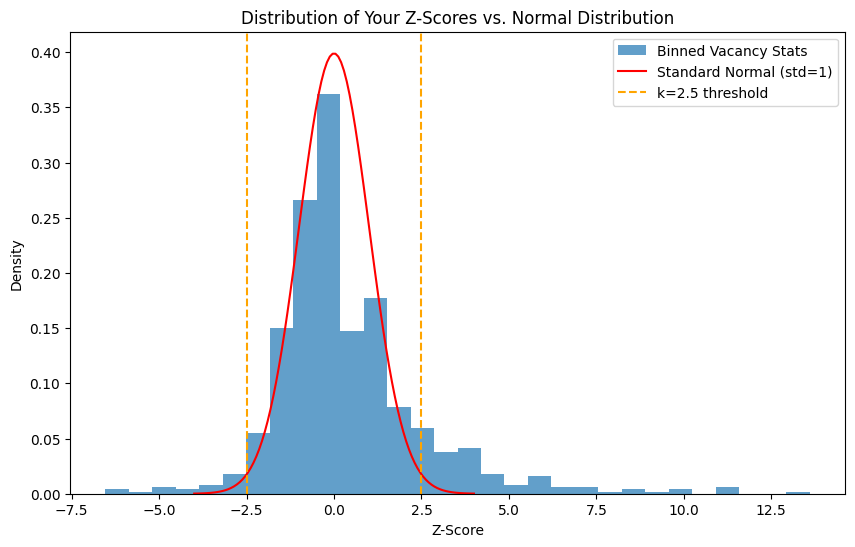

In [140]:
plt.figure(figsize=(10, 6))
plt.hist(ind_vacancies_num_vacancy['ZScore'].dropna(), bins=30, density=True, alpha=0.7, label='Binned Vacancy Stats')

# Overlay a standard normal curve for comparison
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', label='Standard Normal (std=1)')
plt.axvline(x=2.5, color='orange', linestyle='--', label='k=2.5 threshold')
plt.axvline(x=-2.5, color='orange', linestyle='--')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Your Z-Scores vs. Normal Distribution')
plt.show()

In [141]:
# current_data_mask = ind_vacancies_num_payroll['Year'].isin([2025])
# abnormal_mask = ~ind_vacancies_num_payroll["Normality"].eq("Normal")

# ind_vacancies_num_payroll = ind_vacancies_num_payroll[(current_data_mask & abnormal_mask)]
# ind_vacancies_num_payroll = ind_vacancies_num_payroll.reset_index(drop=True)

# ind_vacancies_num_payroll

In [142]:
# current_data_mask = ind_vacancies_num_vacancy['Year'].isin([2025])
# abnormal_mask = ~ind_vacancies_num_vacancy["Normality"].eq("Normal")

# ind_vacancies_num_vacancy = ind_vacancies_num_vacancy[(current_data_mask & abnormal_mask)]
# ind_vacancies_num_vacancy = ind_vacancies_num_vacancy.reset_index(drop=True)

# ind_vacancies_num_vacancy

Note: There are unusual differences detected in the number of employees on payroll but the number of vacant job positions in each industry isn't different.

In [143]:
ind_vacancies_num_payroll.to_csv('../../data/clean/All_Change_in_Payroll_Employees.csv',index=True)

In [144]:
ind_vacancies_num_vacancy.to_csv('../../data/clean/All_Change_in_Job_Vacancies.csv',index=True)